In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data = pd.read_csv('data/BSS_Full_season_Users.csv')
data = pd.read_csv('data/BSS_Full_season_Users.csv', dtype={'hsl_postal_code': str})

In [101]:
data.head()

,hsl_age,hsl_gender,hsl_postal_code,hsl_region,hsl_city,hsl_country,insideArea,trip_count,departure_station1_nunique,return_station1_nunique,...,nearDepStartFromRet_ratio,Days_RetToStartDep_ratio,Days_NearRetToStartDep_ratio,loop_ratio,userDayCount,tripsPerDay,userDayRatio,weekdayTripCount,weekendTripCount,week_weekend_relaRatio
0,52.0,male,00180,Kamppi - Ruoholahti,Helsinki,FI,1,43,15,18,...,0.093023,0.027778,0.055556,0.000000,36,0.245714,0.205714,31.0,12.0,1.033333
1,42.0,NaN,04230,Pihkaniitty,Kerava,FI,0,46,22,24,...,0.282609,0.038462,0.153846,0.000000,27,0.262857,0.154286,41.0,5.0,3.280000
2,44.0,NaN,00160,Katajanokka,Helsinki,FI,1,251,41,41,...,0.482072,0.247423,0.319588,0.003984,98,1.434286,0.560000,246.0,5.0,19.680000
3,45.0,NaN,02700,Kauniainen,Kauniainen,FI,0,17,8,13,...,0.352941,0.000000,0.100000,0.000000,11,0.097143,0.062857,17.0,0.0,17.000000
4,36.0,NaN,00520,Itä-Pasila,Helsinki,FI,1,98,24,26,...,0.265306,0.098361,0.131148,0.000000,62,0.560000,0.354286,81.0,17.0,1.905882


In [102]:
# GENDERS
male_users = data.loc[data['hsl_gender'] == 'male']
female_users = data.loc[data['hsl_gender'] == 'female']

count_male = len(male_users)
count_female = len(female_users)
gender_nan_users = len(data)-count_male-count_female

In [103]:
print('Users genders:')
print('all:', len(data))
print('male:', count_male, 'share:', count_male/len(data)*100)
print('female:', count_female, 'share:', count_female/len(data)*100)
print('other:', gender_nan_users, 'share:', gender_nan_users/len(data)*100)

Users genders:
all: 35196
male: 12625 share: 35.87055347198545
female: 10556 share: 29.992044550517104
other: 12015 share: 34.13740197749745


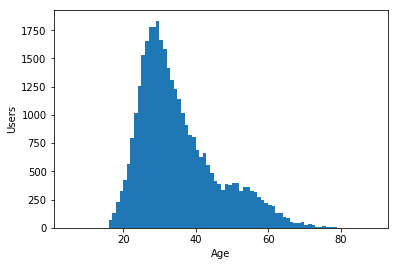

In [104]:
# AGE GROUPS: HISTOGRAM
ages = data.dropna(subset=['hsl_age'])

fig, ax = plt.subplots()
ax.hist(ages.hsl_age, bins=range(5,90))
ax.set(xlabel='Age', ylabel='Users')

fig.savefig('plots/user_ages.png', dpi=150)


In [105]:
# AGE GROUPS: 40-45 V
ages_40_45 = data.loc[(data['hsl_age'] >= 40) & (data['hsl_age'] <= 45)]
print('Users of ages 40-45:', len(ages_40_45))

Users of ages 40-45: 3436


In [106]:
# USERS FROM ESPOO
users_espoo = data.loc[(data['hsl_city'] == 'Espoo')]
print('Users from Espoo:', len(users_espoo))

Users from Espoo: 2675


In [107]:
# SHARE OF INSIDE / OUTSIDE AREA
users_inside = data.loc[(data['insideArea'] == 1)]
users_outside = data.loc[(data['insideArea'] == 0)]

print('Users that live inside the area:', len(users_inside), '-', len(users_inside)/len(data)*100)
print('Users that live outside the area:', len(users_outside), '-', len(users_outside)/len(data)*100)

Users that live inside the area: 24304 - 69.05330151153541
Users that live outside the area: 10892 - 30.946698488464598


In [108]:
# GROUP DATA WITH POSTAL CODES
grouped = data.groupby(['hsl_postal_code'])

In [109]:
pcodes = []
usercounts = []
ratios = []
userdaycounts_mean = []
userdaycounts_median = []
tripcounts_mean = []
tripcounts_median = []
tripcounts_sum = []

for idx, values in grouped:
    gdata = values
    mean_weekend_week_ratio = gdata['week_weekend_relaRatio'].mean()
    userdaycount_mean = gdata['week_weekend_relaRatio'].mean()
    userdaycount_median = gdata['week_weekend_relaRatio'].median()
    tripcount_mean = gdata['trip_count'].mean()
    tripcount_median = gdata['trip_count'].median()
    tripcount_sum = gdata['trip_count'].sum()

    pcodes.append(idx)
    usercounts.append(len(gdata))
    ratios.append(mean_weekend_week_ratio)
    userdaycounts_mean.append(userdaycount_mean)
    userdaycounts_median.append(userdaycount_median)
    tripcounts_mean.append(tripcount_mean)
    tripcounts_median.append(tripcount_median)
    tripcounts_sum.append(tripcount_sum)


pcodestats = pd.DataFrame(data={'pcode': pcodes, 'usercount':usercounts, 'week_weekend_ratio': ratios, 'userdaycount_mean':userdaycounts_mean, 'userdaycount_median': userdaycounts_median, \
                                'tripcount_mean': tripcounts_mean, 'tripcount_median': tripcounts_median, 'tripcount_sum': tripcounts_sum})  


In [110]:
pcodestats.head(5)

,pcode,usercount,week_weekend_ratio,userdaycount_mean,userdaycount_median,tripcount_mean,tripcount_median,tripcount_sum
0,00100,2251,2.473702,2.473702,1.200000,48.423367,31.0,109001
1,00120,724,3.095364,3.095364,1.200000,47.266575,29.0,34221
2,00130,178,2.960543,2.960543,1.354765,37.449438,21.0,6666
3,00140,795,2.587666,2.587666,1.200000,43.771069,27.0,34798
4,00150,1080,2.835541,2.835541,1.200000,48.902778,29.0,52815


In [113]:
# SAVE PCODE STATS TO FILE
pcodestats.to_csv('bss_pcode_stats_1.0.csv')